In [1]:
# Installation of supporting python libraries.
! pip3 install numpy
! pip3 install matplotlib

You should consider upgrading via the 'C:\Users\igorc\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\igorc\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# Installation of PEP8 auto formatting for jupter notebook.
! pip3 install --upgrade autopep8

  Using cached autopep8-2.0.1-py2.py3-none-any.whl (45 kB)
  Using cached pycodestyle-2.10.0-py2.py3-none-any.whl (41 kB)


You should consider upgrading via the 'C:\Users\igorc\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
# Installation of EMNIST dataset (set of handwritten character digits)
! pip3 install emnist

You should consider upgrading via the 'C:\Users\igorc\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [8]:
from emnist import extract_test_samples
from emnist import extract_training_samples
from emnist import list_datasets

# Printing types of avaliable datasets from emnist.
datasets = list_datasets()
print(datasets)

# Assigning dataset training images and labels to variables.
train_images, train_labels = extract_training_samples('balanced')
print("Dataset train images number and dimensions:", train_images.shape)
print("Dataset train images labels number:", train_labels.shape)

# Assigning dataset testing images and labels to variables.
test_images, test_labels = extract_test_samples('balanced')
print("\nDataset test images number and dimensions:", test_images.shape)
print("Dataset test images labels number:", test_labels.shape)

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']
Dataset train images number and dimensions: (112800, 28, 28)
Dataset train images labels number: (112800,)

Dataset test images number and dimensions: (18800, 28, 28)
Dataset test images labels number: (18800,)


In [9]:
# Importing previously imported libraries.
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import array

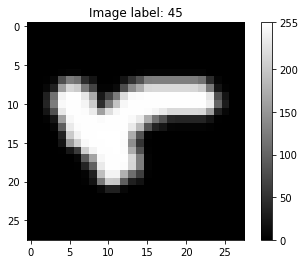

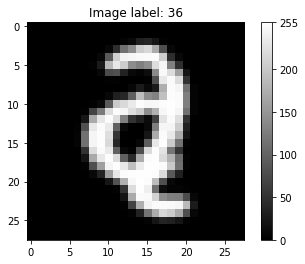

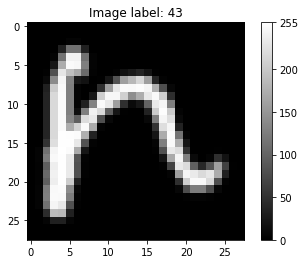

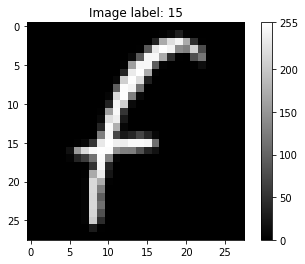

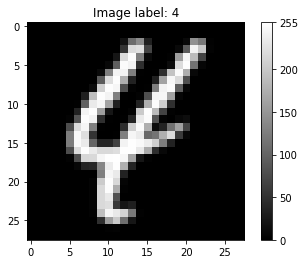

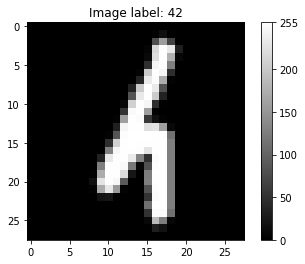

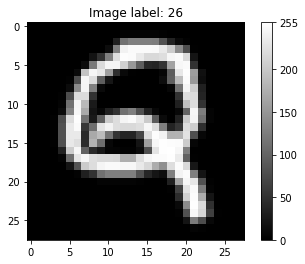

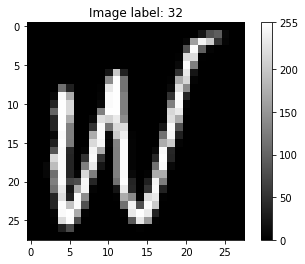

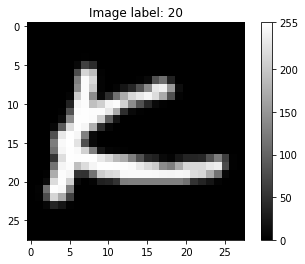

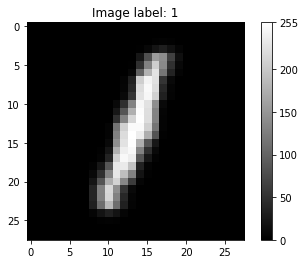

In [10]:
# Displaying the first ten elements of the training set.
for x in range(10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(train_images[x], cmap='gray')
    ax.set_title("Image label: " + str(train_labels[x]))
    plt.colorbar(ticks=[0, 50, 100, 150, 200, 255], orientation='vertical')

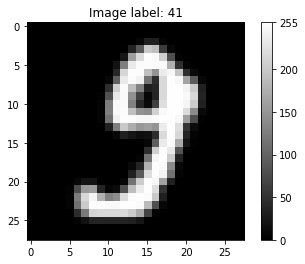

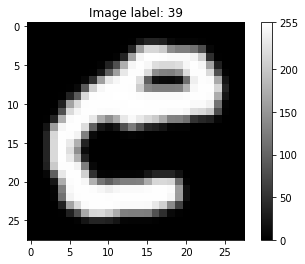

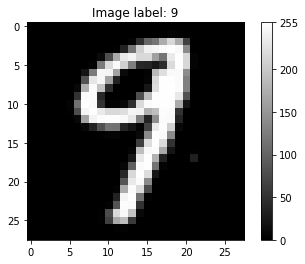

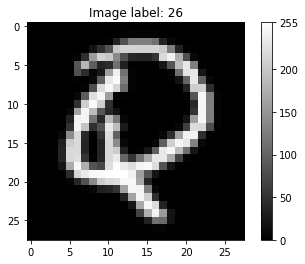

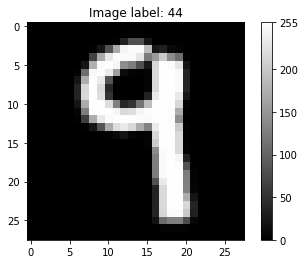

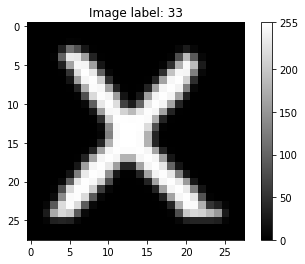

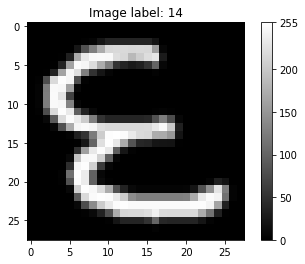

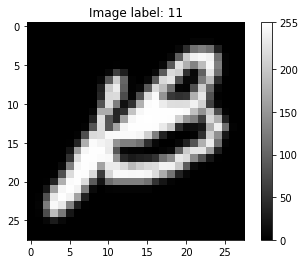

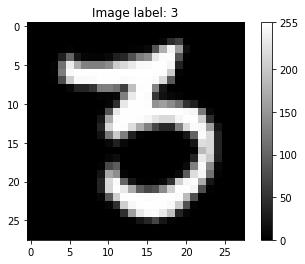

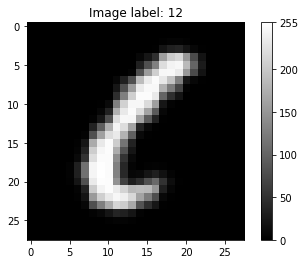

In [11]:
# Displaying the first ten elements of the test set.
for x in range(10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(test_images[x], cmap='gray')
    ax.set_title("Image label: " + str(test_labels[x]))
    plt.colorbar(ticks=[0, 50, 100, 150, 200, 255], orientation='vertical')

C:\Users\igorc\AppData\Local\Temp\ipykernel_15144\2988094758.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


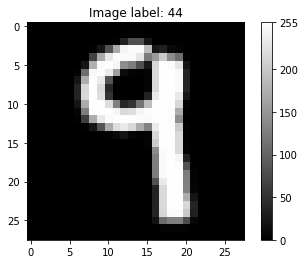

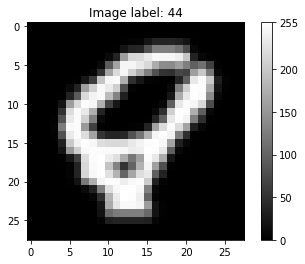

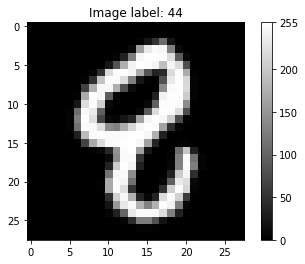

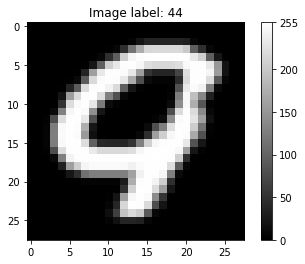

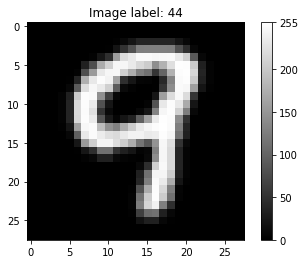

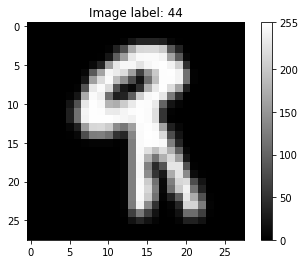

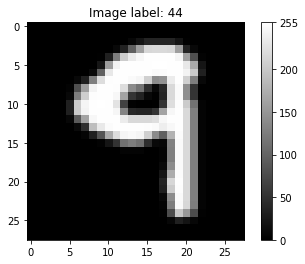

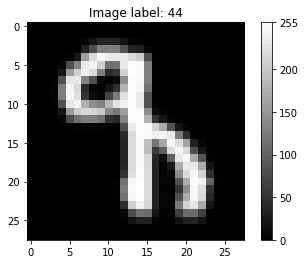

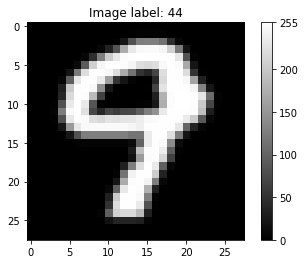

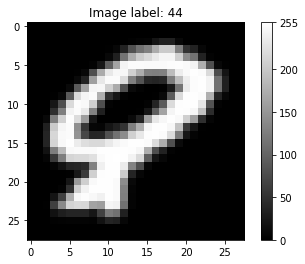

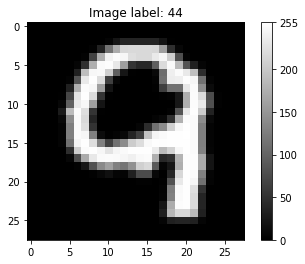

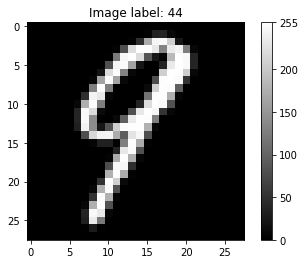

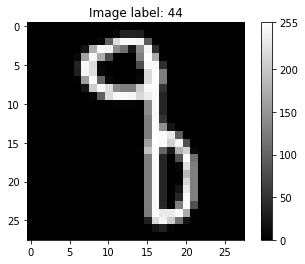

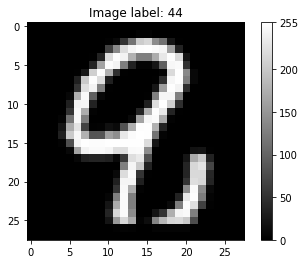

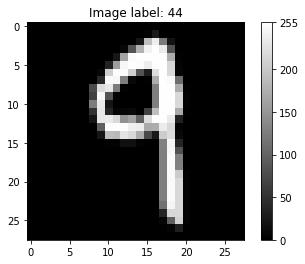

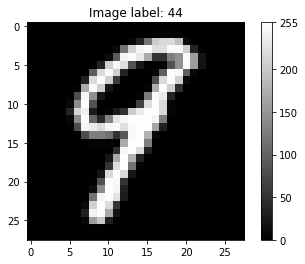

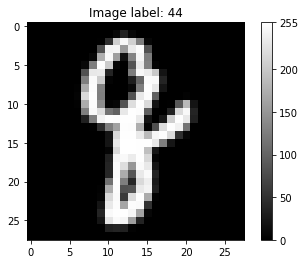

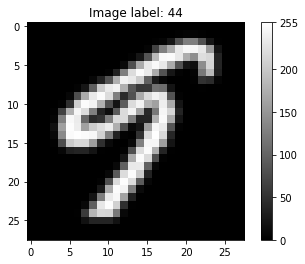

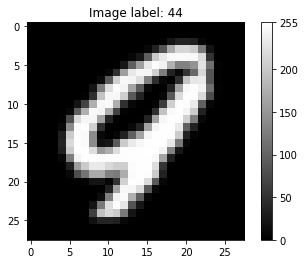

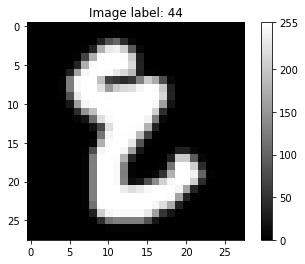

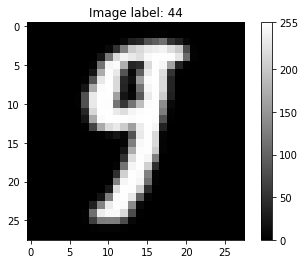

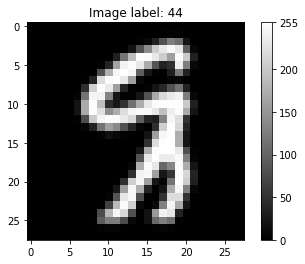

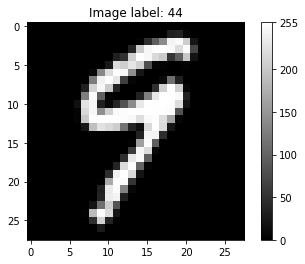

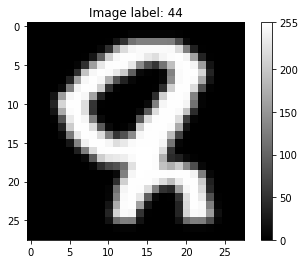

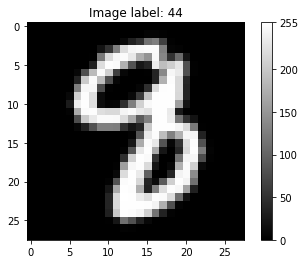

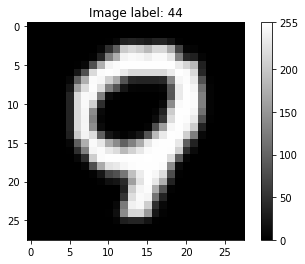

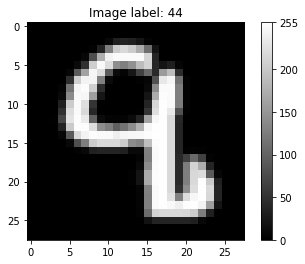

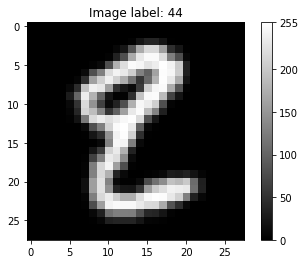

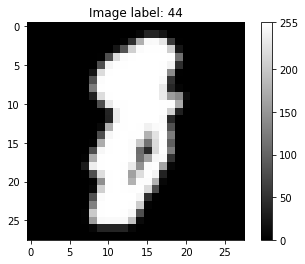

In [12]:
# Displaying the first 44 elements of the test set.
for x in range(1000):
    if test_labels[x] == 44:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        imgplot = plt.imshow(test_images[x], cmap='gray')
        ax.set_title("Image label: " + str(test_labels[x]))
        plt.colorbar(ticks=[0, 50, 100, 150, 200, 255], orientation='vertical')

In [14]:
# Displaying the labels of the learning set and the test set.
print("First 20 training set images labels:")
# no need to do shuffle, label are already mixed.
print(train_labels[:20])
print("\nFirst 20 testing images labels:")
print(test_labels[:20])
print("\n")

First 20 training set images labels:
[45 36 43 15  4 42 26 32 20  1 46 43 15 13 24 12  5 17  3 40]

First 20 testing images labels:
[41 39  9 26 44 33 14 11  3 12 16  7  2 16 16 27  6 44 28 45]




In [17]:
def normalize(x: int) -> float:
    """Change the value of image pixels of range 0 to 255 to constant rane of 0 to 1 to lower the order of magnitude.

    Args:
        x (int): Numeric value of the puxel

    Returns:
        (float): Value of the pixel in lower order of magnitude.
        
    """

    return x/255.0

In [18]:
def pad_with(vector: array, pad_width: array, iaxis: array, **kwargs) -> None:
    """Adding border to the input matrix.

    Args:
        vector (array): The array being modified.
        pad_with (array): The value of added border.
        iaxis (array): The axis of the added border.
        **kwargs: padding value.
    
    Returns:
        None
        
    """

    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [ ]:
def sigmoid(x: array) -> array:
    """Sigomid activation function.

    Args:
        x (array): Input array for sigmoid function transformation.

    Returns:
        float : Sigmoid operation value from the range of 0 to 1.
        
    """
    return 1 / (1 + np.exp(-x))


def relu(x: array) -> array:
    """ReLu activation function.

    Args:
        x (array): Input array of float values for relu function transformation.

    Returns:
        array: maxium value of 0 and odd number in form of float value.
        
    """
    return np.maximum(0.0, x)

In [1]:
# Class that represents convolutional network layer for bigger number of 3d filters.

class ConvolutionalLayer:
    """A class representing convolutional layer.
    
    
    Args:
        filters_num (int):number of filters in one layer
        filter_h (int): hieght of the filter
        filter_w (int): width of the filter
        filter_d (int): density of the filter
        stride (int):   the step in the convolution operation
        cnn_layer_no (int): number of convolutional network layer
        padding (bool): the margin added 

    """

    def __init__(self, filters_num: int, filter_h: int, filter_w: int, filter_d: int, stride: int, cnn_layer_no: int, padding: bool) -> None:
        self.filters_num = filters_num
        self.stride = stride
        self.filter_h = filter_h
        self.filter_w = filter_w
        self.filter_d = filter_d
        self.cnn_layer_no = cnn_layer_no
        self.padding = padding.capitalize()


        # Generating filters values with random numbers from 0 to 1 range.
        self.filters = np.array([np.random.rand(
            self.filter_d, self.filter_h, self.filter_w) - 0.5 for x in range(self.filters_num)])

        # Generatin bias values.
        self.biases = np.ones(self.filters_num)

    def conv_process(self, input: array) -> None:
        """Operation of convolution on the given image.
        
        Args:
            input (array): Input image
            
        Returns:
            None
            
        """
        self.input = input

        # Reading the dimensions of the image depending on the number of channels"""
        if len(self.input.shape) == 2:
            self.height, self.width = self.input.shape  # dimension of 2D image
        else:
            self.depth, self.height, self.width = self.input.shape  # dimensions of 3D image

        # Checking if the depth of the filter is equal to the depth of the channel
        if (len(self.input.shape) == 3 and self.depth == self.filter_d) or len(self.input.shape) == 2:

            # Add padding to the input data
            if self.padding == "True":
                self.image_padded = np.pad(self.input, 1, pad_with)
                if len(self.input.shape) == 3:
                    # cut out the first and last channels consisting only zeros
                    self.image_padded = self.image_padded[1:-1]
            else:
                self.image_padded = self.input

            # Read the dimensions of the padded image depending on the number of channnels 
            if len(self.input.shape) == 2:
                # wymiary obrazu z paddingiem
                self.height_pad, self.width_pad = self.image_padded.shape
            else:
                # wymiary obrazu 3d z paddinguem
                self.height_pad, self.width_pad = self.image_padded.shape[1:]

            # Range of convolution operation
            self.stride_range = int(
                ((self.width - self.filter_w + 2 * 1) / self.stride) + 1)

            # Dimensions of the output array
            self.shape_dim = int(
                ((self.width - self.filter_w + 2 * 1) / self.stride) + 1)

            # Convolution output table
            self.conv_output = np.zeros(
                (self.filters_num, self.shape_dim, self.shape_dim))

            # Convolution operation
            for f in range(self.filters_num):
                y = 0
                for h in range(0, self.stride_range, self.stride):
                    x = 0
                    for w in range(0, self.stride_range, self.stride):
                        # Setting the space of 3D or 2D input data for the convolution
                        if len(self.input.shape) == 3:
                            # [depth, height, width]
                            self.temp_arr = self.image_padded[0:self.depth, h:h + self.filter_h, w:w + self.filter_w]
                        else:
                            self.temp_arr = self.image_padded[h:h + self.filter_h, w:w + self.filter_w]
                        self.conv = (np.multiply(self.filters[f], self.temp_arr)).mean() + self.biases[f]
                        self.conv_output[f][y][x] = self.conv
                        x += 1
                    y += 1

            self.conv_output = np.where(self.conv_output > 255, 255, self.conv_output)
        else:
            print("The depth fo the filter is different from the depth of the input data. The convolution process wasn't executed properly")

    def backwards(self, dvalues):
        """Funkcja dokonująca wstecznej propagacji warstwy konwolucyjnej.

        Args:
              dvalues(numpy array): Obraz wejściowy ze wstecznej propagacji.

        """
        self.dvalues = dvalues
        self.dv_filters_180 = np.copy(self.filters)

        # obrócenie filtrów o 180 stopni względem osi X i Y
        for i in range(self.filters_num):
            for d in range(self.filter_d):
                self.dv_filters_180[i][d] = np.rot90(
                    self.dv_filters_180[i][d], 2, axes=(0, 1))
        # Transponowanie filtrów w celu zgodności wymiarów dla wstecznej propagacji
        # Zmiana miejscami osi: ilość filtrów, głębokość
        self.dv_filters_T = np.moveaxis(self.dv_filters_180, 0, 1)
        self.dv_filters_num, self.dv_filters_d, self.dv_filters_h, self.dv_filters_w = self.dv_filters_T.shape
        """Odczytanie wymiarów obrazu w zależnoścci od ilości kanałów"""
        if len(self.dvalues.shape) == 2:
            self.dv_height, self.dv_width = self.dvalues.shape  # wymiary zwykłego obrazu 2d
        else:
            # wymiary zwykłego obrazu 3d
            self.dv_depth, self.dv_height, self.dv_width = self.dvalues.shape

        """padding"""
        if len(self.dvalues.shape) == 2:
            self.dvalues_padded = np.pad(self.dvalues, 1, pad_with)
        else:
            self.dvalues_padded = np.pad(self.dvalues, 1, pad_with)
            # wycinamy kanały pierwszy i ostatni złożone z samych zer
            self.dvalues_padded = self.dvalues_padded[1:-1]

        """Odczytanie wymiarów obrazu z paddingiem w zależnoścci od ilości kanałów."""
        if len(self.dvalues.shape) == 2:
            # wymiary obrazu z paddingiem
            self.dv_height_pad, self.dv_width_pad = self.dvalues_padded.shape
        else:
            # wymiary obrazu 3d z paddinguem
            self.dv_height_pad, self.dv_width_pad = self.dvalues_padded.shape[1:]

        """Końcowa granica pętli dokonującej operacji konwolucji/splotu."""
#         self.dv_stride_range = int(self.dv_width_pad - np.ceil(self.filter_w/2)) # dla obrazu o wymiarze 28x28 i 30x30(z paddingiem) stride_range = 30
        self.dv_stride_range = int(
            ((self.dv_width - self.filter_w + 2 * 1) / self.stride) + 1)

        """Wymiary macierzy wyjściowej."""
        self.dv_shape_dim = int(
            ((self.dv_width - self.filter_w + 2 * 1) / self.stride) + 1)

        """tablica pomocnicza dla wyników."""
        self.conv_dvalues = np.zeros(
            (self.dv_filters_num, self.dv_shape_dim, self.dv_shape_dim))

        if self.cnn_layer_no != 1:
            """Proces konwolucji."""
            for f in range(self.dv_filters_num):
                y = 0
                for h in range(0, self.dv_stride_range, self.stride):
                    x = 0
                    for w in range(0, self.dv_stride_range, self.stride):
                        """Wyznaczenie przestrzeni danych wejściowych 3d lub obszaru 2d do konwolucji."""
                        if len(self.dvalues.shape) == 3:
                            # [depth, height, width]
                            self.dv_temp_arr = self.dvalues_padded[0:self.dv_depth,
                                                                   h:h + self.dv_filters_h, w:w + self.dv_filters_w]
                        else:
                            self.dv_temp_arr = self.dvalues_padded[h:h +
                                                                   self.dv_filters_h, w:w + self.dv_filters_w]

                        self.dv_conv = (np.multiply(
                            self.dv_filters_T[f], self.dv_temp_arr)).mean()

                        self.conv_dvalues[f][y][x] = self.dv_conv

                        x += 1
                    y += 1

        """WSTECZNA PROPAGACJA DLA FILTRÓW"""
        # filtry

        """Wsteczna propagacjia dla filtrów v4."""

        if len(self.image_padded.shape) == 2:
            self.image_padded_backprop = self.image_padded[np.newaxis, :, :]
        else:
            self.image_padded_backprop = self.image_padded

        if len(self.dvalues) == 2:
            self.dvalues_backprop = self.dvalues[np.newaxis, :, :]
        else:
            self.dvalues_backprop = self.dvalues

        """v1"""
        self.dw_filters = np.zeros(self.filters.shape)
        for f in range(self.filters_num):
            divider = np.count_nonzero(self.dvalues_backprop[f] > 0)
            for d in range(self.filter_d):
                y = 0
                for h in range(0, self.dv_stride_range, self.stride):
                    x = 0
                    for w in range(0, self.dv_stride_range, self.stride):
                        self.dw_filters[f][d] += (self.image_padded_backprop[d, h:h + self.dv_filters_h, w:w + self.dv_filters_w])*(
                            self.dv_filters_w * self.dv_filters_w) * self.dvalues_backprop[f][y][x]
                        x += 1
                    y += 1

        self.dv_biases = np.zeros(self.biases.shape)
        for n in range(self.filters_num):
            self.dv_biases[n] = np.sum(self.dvalues_backprop[n])

    def update(self, learning_rate):
        self.learning_rate = learning_rate

        self.biases = self.biases - learning_rate * self.dv_biases
        self.filters = self.filters - learning_rate * self.dw_filters

In [ ]:
f_min, f_max = np.amin(img1), np.amax(img1)
img1 = (img1 - f_min) / (f_max - f_min)

In [ ]:
c1 = ConvolutionalLayer(1, 5, 5, 1, 1, 2, "true")
print(c1.filters)
c1.conv_process(train_images[0])
print(c1.conv_output.shape)

In [ ]:
print(c1.conv_output.shape)
for x in c1.conv_output:
    img1 = x
    f_min, f_max = img1.min(), img1.max()
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))
    print("-----------------------------------------------")

In [ ]:
c1.backwards(c1.conv_output)
print(c1.filters)
print(c1.dv_filters_180)
print(c1.conv_output)
print(c1.conv_output.shape)

In [ ]:
# Klasa reprezentująca warstwę funkcji aktywacji ReLu - Rectified Linear Unit
class ReLu:
    def forwards(self, inputs):
        self.inputs = inputs
        self.output = np.array([relu(x) for x in self.inputs])

    def backwards(self, dvalues):

        self.dvalues = dvalues

        self.dvalues_reshaped = self.dvalues.reshape(self.inputs.shape)

        self.dinputs = self.dvalues_reshaped.copy()

        self.dinputs[self.inputs <= 0] = 0

In [ ]:
"""Wersja najnowsza z dnia 06-04-2021."""
# Klasa reprezentująca warstwę pooling


class MaxPooling:
    def __init__(self, pooling_dim, stride):
        self.pooling_dim = pooling_dim
        self.stride = stride

    def forwards(self, input):
        """Funkcja przekazująca wartości w głąb sieci."""
        self.input = input

        """Odczytanie wymiarów wejścia w zależności od ilości kanałów."""
        if len(self.input.shape) == 2:
            self.height, self.width = self.input.shape  # wymiary dla danych wejścowych 2d
        else:
            # wymiary dla danych wejściowych 3d
            self.depth, self.height, self.width = self.input.shape

        """Obliczenie wymiarów wyjściowych w osi X/Y po operacji poolingu."""
        # W2 = (W1 - F) / S + 1
        self.output_dim = int(
            np.ceil((self.height - self.pooling_dim) / self.stride + 1))

        """Zdefiniowanie pierwotnej, pomocniczej macierzy(tensora) wyjściowej złożonej z zer."""
        if len(self.input.shape) == 2:
            self.pooling_output = np.zeros((self.output_dim, self.output_dim))
        else:
            self.pooling_output = np.zeros(
                (self.depth, self.output_dim, self.output_dim))

        """Tablica pomocnicza do zapisania współrzędnych max wartości poolingu."""
        self.pooling_coordinates = self.input.copy()

        def pooling_ranges(iter_range, pooling_dim, input_dim):
            """Funkcja zwracająca wymiary zakresu poolingu, w przypadku,
                gdy wykroczy on poza zakres macierzy wejściowej.

            Args:
                iter_range(int): Wymiar(wyokość/szerokość) macierzy wynikający z iteracji.
                pooling_dim(int): Wymiar zakresu poolingu.
                input_dim(int): Wymiar(wyokość/szerokość) macierzy wejśćiowej

            Return:
                start(int): Początek zakresu poolingu.
                end(int): Koniec zakresu poolingu

            """
            if iter_range + pooling_dim > input_dim:
                start = input_dim - pooling_dim
                end = input_dim
            else:
                start = iter_range
                end = iter_range + pooling_dim
            return start, end

        """Operacja poolingu odpowiednio dla jednego kanału oraz więcej niż jeden."""
        if len(self.input.shape) == 2:
            y = 0  # wymiar po wysokości tablicy wyjściowej
            for h in range(0, self.height, self.stride):
                x = 0  # wymiar po szerokości tablicy wyjściowej

                """Sprawdzenie, czy zakres poolingu nie wychodzi poza wysokość macierzy."""
                self.height_start, self.height_end = pooling_ranges(
                    h, self.pooling_dim, self.height)

                for w in range(0, self.width, self.stride):

                    """Sprawdzenie, czy zakres poolingu nie wychodzi poza szerokość macierzy."""
                    self.width_start, self.width_end = pooling_ranges(
                        w, self.pooling_dim, self.width)

                    self.area = self.input[self.height_start:self.height_end,
                                           self.width_start:self.width_end]
                    self.pooling_output[y][x] = np.amax(self.area)

                    if self.pooling_output[y][x] != 0:
                        i_1, j_1 = np.where(
                            self.area == self.pooling_output[y][x])
                        if len(i_1) > 1 or len(j_1) > 1:
                            i_1 = [i_1[0]]
                            j_1 = [j_1[0]]
                        i_1 = i_1[0]
                        j_1 = j_1[0]
                        self.temp = np.zeros((self.stride, self.stride))
                        self.temp[i_1][j_1] = 1
                        self.pooling_coordinates[self.height_start:self.height_end,
                                                 self.width_start:self.width_end] = self.temp
                        self.coordinates_arr = []
                        for h_c in range(0, len(self.pooling_coordinates), 1):
                            for w_c in range(0, len(self.pooling_coordinates[0]), 1):
                                if self.pooling_coordinates[h_c][w_c] == 1:
                                    self.coordinates_arr.append([h_c, w_c])

                        """TRZEBA POPRAWIĆ NA NORMALNY, czytelny KOD..."""

                    x += 1
                y += 1
        else:
            self.coordinates_arr = []
            for d in range(0, self.depth):
                y = 0  # wymiar po wysokości tablicy wyjściowej
                # print(len(self.coordinates_arr))
                for h in range(0, self.height, self.stride):
                    x = 0  # wymiar po szerokości tablicy wyjściowej

                    """Sprawdzenie, czy zakres poolingu nie wychodzi poza wysokość macierzy."""
                    self.height_start, self.height_end = pooling_ranges(
                        h, self.pooling_dim, self.height)

                    for w in range(0, self.width, self.stride):

                        """Sprawdzenie, czy zakres poolingu nie wychodzi poza szerokość macierzy."""
                        self.width_start, self.width_end = pooling_ranges(
                            w, self.pooling_dim, self.width)

                        # print(self.input[d, self.height_start:self.height_end, self.width_start:self.width_end])
                        self.area = self.input[d, self.height_start:self.height_end,
                                               self.width_start:self.width_end]
                        self.pooling_output[d][y][x] = np.amax(self.area)

                        """Wynaczenie występowania wszystkich max wartośći z max poolingu."""
                        i_1, j_1 = np.where(
                            self.area == self.pooling_output[d][y][x])
                        if len(i_1) > 1 or len(j_1) > 1:
                            i_1 = [i_1[0]]
                            j_1 = [j_1[0]]
                        i_1 = i_1[0]
                        j_1 = j_1[0]
                        self.temp = np.zeros((self.stride, self.stride))
                        self.temp[i_1][j_1] = 1
                        self.pooling_coordinates[d, self.height_start:self.height_end,
                                                 self.width_start:self.width_end] = self.temp

                        x += 1
                    y += 1

            """"Przypisanie współrzędnych z max poolingu do tablicy."""
            for d_c in range(0, self.depth, 1):
                for h_c in range(0, len(self.pooling_coordinates[0]), 1):
                    for w_c in range(0, len(self.pooling_coordinates[0]), 1):
                        if self.pooling_coordinates[d_c][h_c][w_c] == 1:
                            self.coordinates_arr.append([d_c, h_c, w_c])

    def backwards1(self, dvalues):
        """Funkcja wstecznej propagacji."""
        self.dvalues = dvalues
        # algorytm dokonujący zmiany wymiarów na 2D / 3D w zależoności od danych wejściowych
        if len(self.dvalues.shape) == 1:
            self.reshaped_input = self.dvalues.reshape(
                self.pooling_output.shape)
        elif len(self.dvalues.shape) == 2:
            self.dvalues_height, self.dvalues_width = self.dvalues.shape
            if self.dvalues_height != self.dvalues_width:
                self.reshaped_input = self.dvalues.reshape(
                    self.pooling_output.shape)
            else:
                self.reshaped_input = self.dvalues
        else:
            self.reshaped_input = self.dvalues

        """Test max pooling jest dobrze zrobiony."""
        self.back_arr = np.zeros(self.input.shape)
        for x in range(len(self.coordinates_arr)):
            d, h, w = self.coordinates_arr[x]
            self.back_arr[d][h][w] = 1

        self.reshaped_depth, self.reshaped_height, self.reshaped_width = self.reshaped_input.shape
        self.dinput = self.back_arr.copy()
        i = 0
        for d in range(self.depth):  # for d in range(self.reshaped_depth):
            for h in range(self.height):
                j = 0
                for w in range(self.width):
                    if self.dinput[d][h][w] == 1:
                        self.dinput[d][h][w] = self.dinput[d][h][w] * \
                            (self.reshaped_input.flatten())[j]
                        j = j + 1
                i = i + 1

    def backwards(self, dvalues):
        """Funkcja wstecznej propagacji."""
        self.dvalues = dvalues

        if len((self.dvalues).shape) != 1:
            self.dvalues = self.dvalues.flatten()

        """Test max pooling jest dobrze zrobiony."""
        self.back_arr = np.zeros(self.input.shape)
        for x in range(len(self.coordinates_arr)):
            d, h, w = self.coordinates_arr[x]
            self.back_arr[d][h][w] = 1

        self.dinput = self.back_arr.copy()

        i = 0
        for d in range(self.depth):
            for h in range(self.height):
                for w in range(self.width):
                    if self.dinput[d][h][w] == 1:

                        self.dinput[d][h][w] = self.dinput[d][h][w] * \
                            self.dvalues[i]
                        i += 1

In [ ]:
# DOBRA WERSJA, WSZYSTKO DZIAŁĄ ELEGANCKO
class NeuralNetwork6:

    def __init__(self, n_inputs, n_neurons, nn_layer_no):
        self.nn_layer_no = nn_layer_no
        """He weight initialization."""
        self.weights = np.random.rand(n_inputs, n_neurons) - 0.5
        self.biases = np.ones(n_neurons)

    def forwards(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backwards(self, dvalues):
        """Funkcja dokonująca proces wstecznej propagacji błędu, wyznaczając zmianę/deltę wag oraz biasów.

        Args:
            dvalues(numpy array): wektor/macierz złożona z pochodnych, przekazanych wstecz, z warstwy następnej. 
        # """
        self.dvalues = dvalues
        self.dweights = np.dot(
            (self.inputs[np.newaxis, :]).T, self.dvalues[np.newaxis, :])  # wariant 2

        if self.nn_layer_no != 1:
            # wyznaczenie zmiennych idących dalej, podawanych do poprzedniej warstwy
            self.dinputs = np.dot(self.dvalues, self.weights.T)

        # biasy
        # wyznaczenie zmian/delt dla biasów
        self.dbiases = self.dvalues * np.ones(self.biases.shape)

    # SGD s 247 NN - można stworzyć osobną klasę do updatowania wag.
    def update(self, learning_rate):
        self.learning_rate = learning_rate

        self.biases = self.biases - learning_rate * self.dbiases
        self.weights = self.weights - learning_rate * self.dweights


class Sigmoid6:

    def forwards(self, inputs):
        self.output = sigmoid(inputs)

    def backwards(self, dvalues):
        # dE/do1 * do1/dzo1 | dE/dout * dout/dnet
        self.dinputs = dvalues * (1 - self.output) * self.output


class Softmax6:

    def forwards(self, inputs):
        self.inputs = inputs
        # zapobieganie wysokim wartościom exp / overflow
        self.exp_inputs = np.exp(self.inputs - np.max(self.inputs))
        self.exp_inputs_norm = self.exp_inputs / (np.sum(self.exp_inputs))

    def backwards(self, dvalues):
        self.dvalues = dvalues
        self.dinputs = dvalues * \
            (self.exp_inputs_norm*(1-self.exp_inputs_norm))


class CrossEntropyLoss:

    def forwards(self, inputs, target):
        self.inputs = inputs
        self.target = target
        self.y_pred_clipped = np.clip(self.inputs, 1e-7, 1-1e-7)
        self.y_pred = (-1)*(np.sum(np.log(self.y_pred_clipped) * self.target))
        self.y_pred2 = -np.mean(np.log(self.y_pred_clipped) * self.target)

    def backwards(self, dvalues, target):
        self.dvalues = dvalues
        self.target = target
        samples = len(self.dvalues)
        self.dinputs = dvalues.copy()
        for x in range(len(self.dvalues)):
            self.dinputs[x] = self.dinputs[x] - target[x]
        self.dinputs = self.dinputs

    def backwards1(self, dvalues, y_true):
        samples = len(dvalues)
        self.y_true = y_true
        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples


class Softmax_Cross():

    def __init__(self):
        self.actvation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def backwards(self, dvalues, target):
        self.target = target
        self.dvalues = dvalues
        self.dinputs = dvalues.copy()


# Klasa reprezentująca warstwę funkcji aktywacji ReLu - Rectified Linear Unit
class ReLu6:
    def forwards(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backwards(self, dvalues):
        self.dvalues = dvalues
        self.dinputs = self.dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0


class LeakyReLu6:
    def forwards(self, inputs):
        self.inputs = inputs
        self.output = np.where(
            self.inputs > 0, self.inputs, self.inputs * 0.001)

    def backwards(self, dvalues):
        self.dvalues = dvalues
        self.dinputs = self.dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0.001  # 0.0001


def flatten(inputs):
    return inputs.flatten()

In [ ]:
# Klasa dropout do dezakatywowania losowych neuronówo zadany współczynnik procentowy
class Dropout:

    def __init__(self, drop_rate):
        self.drop_rate = drop_rate

    def forwards(self, inputs):
        self.inputs = inputs
        # jest 1 - drop_rate, bo w np.binomial okreslamy prawdopodobieństwo powodzenia. Czli 1 - 0.2 = 0.8
        self.drop_arr = np.random.binomial(
            1, 1 - self.drop_rate, size=self.inputs.shape) / (1 - self.drop_rate)
        self.output = self.inputs * self.drop_arr

    def backwards(self, dvalues):
        self.dvalues = dvalues
        self.dinputs = self.dvalues * self.drop_arr

In [ ]:
class Learning_Rate_Optim:

    def __init__(self, learning_rate, learning_rate_drop):
        self.learning_rate = learning_rate
        self.new_learning_rate = learning_rate
        self.learning_rate_drop = learning_rate_drop
        self.iteration = 0

    def learning_rate_change(self):
        self.new_learning_rate = self.learning_rate * \
            (1 / (1 + self.learning_rate_drop * self.iteration))
        self.iteration += 1

In [ ]:
np.save('n2 nn3 weights 31014k', nn3.weights)
np.save('n2 nn3 biases 31014k', nn3.biases)
np.save('n2 cnn1 filters 31014k', cnn1.filters)
np.save('n2 cnn1 biases 31014k', cnn1.biases)
np.save('n2 acc_tab_train 31014k', acc_tab_train)
np.save('n2 loss_tab_train 31014k', loss_tab_train)
np.save('n2 acc_tab_test 31014k', acc_tab_test)
np.save('n2 loss_tab_test 31014k', loss_tab_test)
print("Zapisano")

In [ ]:
cnn_filters_start = np.load('acnn5 nn3 cnn1_filters start.npy')
nn_weights_start = np.load('acnn5 nn3 nn3_weights start.npy')
print("Poprawnie wczytano dane")

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
"""Moduł trenowania"""
"""----------------------------------CNN8--------------------------------------------------"""


for t in range(1):

    cnn1 = ConvolutionalLayer(10, 5, 5, 1, 1, 1, "True")

    pool1 = MaxPooling(2, 2)

    relu1 = ReLu6()

    leaky_relu1 = LeakyReLu6()

    cnn2 = ConvolutionalLayer(5, 3, 3, 10, 1, 2, "True")

    cnn2.filters = np.array([np.random.rand(
        cnn2.filter_d, cnn2.filter_h, cnn2.filter_w) - 0.5 for x in range(cnn2.filters_num)])

    cnn2.biases = cnn2.biases

    pool2 = MaxPooling(2, 2)

    relu2 = ReLu6()

    leaky_relu2 = LeakyReLu6()

    nn1 = NeuralNetwork6(245, 47, 2)

    nn1_softmax = Softmax6()

    loss = CrossEntropyLoss()

    cnn1.filters = cnn1.filters * 0.1

    cnn1.biases = cnn1.biases * 1

    cnn2.filters = cnn2.filters * 0.1

    cnn2.biases = cnn2.biases * 1

    nn1.weights = nn1.weights * 0.00000000000000001

    nn1.biases = nn1.biases * 1

    lr = Learning_Rate_Optim(0.05, 0.05)  # dać po tym 0.005, 0.05

    dropout1 = Dropout(0.9)

    """----------------------------------TEST TRENINGU--------------------------------------------------"""
    acc_tab_train = []
    loss_tab_train = []
    acc_tab_test = []
    loss_tab_test = []
    for r in range(225):
        lr.learning_rate_change()
        k = 0
        loss_stats = [[] for x in range(47)]  # dla emnista
        loss1_list = []
        loss_stats2 = [[] for x in range(47)]  # dla emnista
        loss2_list = []
        train_batch_size = 11280
        train_batch_size = 500
        range_num = r*train_batch_size
        acc = 0
        acc_fin = 0
        acc_fin_ult = 0
        i = 0
        y = 1
        l = 0
        l2 = 0
        for x in range(range_num, range_num+train_batch_size):
            nn_input = train_images[x]
            nn_output = np.zeros(47)
            nn_output[train_labels[x]] = 1

            # CNN and NN forward propagation
            cnn1.conv_process(nn_input)  # CNN
            pool1.forwards(cnn1.conv_output)
            leaky_relu1.forwards(pool1.pooling_output)
            cnn2.conv_process(leaky_relu1.output)
            pool2.forwards(cnn2.conv_output)
            leaky_relu2.forwards(pool2.pooling_output)
            nn_input_flatten = (leaky_relu2.output).flatten()  # CNN
            nn1.forwards(nn_input_flatten)
            nn1_softmax.forwards(nn1.output)
            loss.forwards(nn1_softmax.exp_inputs_norm, nn_output)

            # NN loss
            print("Train iteration: " + str(x) + " | loss 1: " + str(loss.y_pred) +
                  " - label: " + str(train_labels[x]))  # !!!!!!!!!!!!!
            loss_stats[train_labels[x]].append(loss.y_pred)
            loss1_list.append(loss.y_pred)

            # NN backprop
            loss.backwards(nn1_softmax.exp_inputs_norm, nn_output)
            nn1.backwards(loss.dinputs)
            leaky_relu2.backwards(
                (nn1.dinputs).reshape(pool2.pooling_output.shape))
            pool2.backwards1(leaky_relu2.dinputs)
            cnn2.backwards(pool2.dinput)
            leaky_relu1.backwards(cnn2.conv_dvalues)
            pool1.backwards1(leaky_relu1.dinputs)
            cnn1.backwards(pool1.dinput)  # CNN

            # Update weight, biases and change learning rate
            nn1.update(lr.new_learning_rate*1)  # 1
            cnn2.update(lr.new_learning_rate*0.1)  # 0.1
            cnn1.update(lr.new_learning_rate*0.01)  # 0.001

            print(lr.new_learning_rate)
            print("\ncnn1", cnn1.filters[5][0][0])
            print("cnn2", cnn2.filters[3][0][0])
            print("nn1", nn1.weights[90][0])
            print(
                "-----------------------------------------------------------------------------------")

            acc = 1 if np.argmax(
                nn1_softmax.exp_inputs_norm) == train_labels[x] else 0

            acc_fin += acc
            l += loss.y_pred
            acc_fin_ult += acc
            l2 += loss.y_pred2

        acc_tab_train.append(acc_fin/train_batch_size)
        loss_tab_train.append(l/train_batch_size)

        acc_fin = acc_fin/train_batch_size
        print("Accuracy:", acc_fin*100, "% Loss:", l /
              train_batch_size, "Loss:", l2/train_batch_size)

print("ACC FIN ULT", acc_fin_ult/10000)

In [ ]:
nn_input = train_images[x]
nn_output = np.zeros(47)
nn_output[train_labels[x]] = 1
print(train_labels[x])
img1 = train_images[x]
f_min, f_max = np.amin(img1), np.amax(img1)
img1 = (img1 - f_min) / (f_max - f_min)
plt.show(plt.imshow(img1, cmap='gray'))
print(nn_output)

In [ ]:
def save_data(x):
    np.save('_cnn9 nn3 weights['+str(x)+"]k", nn1.weights)
    np.save('_cnn9 nn3 biases['+str(x)+"]k", nn1.biases)
    np.save('_cnn9 cnn1 filters['+str(x)+"]k", cnn1.filters)
    np.save('_cnn9 cnn1 biases['+str(x)+"]k", cnn1.biases)
    np.save('_cnn9 cnn2 filters['+str(x)+"]k", cnn2.filters)
    np.save('_cnn9 cnn2 biases['+str(x)+"]k", cnn2.biases)
    np.save('_cnn9 acc_tab_train['+str(x)+"]k", acc_tab_train)
    np.save('_cnn9 loss_tab_train['+str(x)+"]k", loss_tab_train)
    np.save('_cnn9 acc_tab_test['+str(x)+"]k", acc_tab_test)
    np.save('_cnn9 loss_tab_test['+str(x)+"]k", loss_tab_test)
    np.save('_cnn9 loss_stats['+str(x)+"]k", loss_stats)
    np.save('_cnn9 loss1_list['+str(x)+"]k", loss1_list)
    np.save('_cnn9 loss_stats2['+str(x)+"]k", loss_stats2)
    np.save('_cnn9 loss2_list['+str(x)+"]k", loss2_list)
    print("Zapisano")

In [ ]:
save_data(112500)

In [ ]:
cnn1_filters = cnn1.filters
cnn1_biases = cnn1.biases
nn3_weights = nn3.weights
nn3_biases = nn3.biases

In [ ]:
print(lr.new_learning_rate)

In [ ]:
def save_data2(x):
    np.save('acnn5 nn3 cnn1_filters start', cnn1_filters)
    np.save('acnn5 nn3 cnn1_biases start', cnn1_biases)
    np.save('acnn5 nn3 nn3_weights start', nn3_weights)
    np.save('acnn5 nn3 nn3_biases start', nn3_biases)

In [ ]:
print(loss.y_pred)
print(loss.y_pred2)

In [ ]:
n1 = np.load('n2 nn3 weights[112499]k.npy')
n2 = np.load('an2 nn3 weights[0]k.npy')

In [ ]:
"""MODUŁ TESTOWANIA"""
"""----------------------------------TEST Z POPRAWIONYM POOLINGIEM - CNN,NN,Pool,relu,--------------------------------------------------"""

for t in range(1):

    acc_tab_test = []
    loss_tab_test = []

    # ostateczny nn i cnn - najważniesze!
    for r in range(1):

        # ----------------------------------TEST DATASET--------------------------------------------------
        #nn + cnn + relu + maxpool
        loss_stats = [[] for x in range(47)]  # dla emnista
        test_bach_size = 18800
        range_num = 0
        acc = 0
        acc_fin = 0
        acc_fin_ult = 0
        i = 0
        y = 1
        l = 0

        for x in range(0, range_num+test_bach_size):
            nn_input = test_images[x]
            nn_output = np.zeros(47)  # dla emnista
            nn_output[test_labels[x]] = 1

            cnn1.conv_process(nn_input)  # CNN
            pool1.forwards(cnn1.conv_output)
            relu1.forwards(pool1.pooling_output)
            nn_input_flatten = (relu1.output).flatten()  # CNN
            nn1.forwards(nn_input_flatten)
            nn1_softmax.forwards(nn1.output)
            loss.forwards(nn1_softmax.exp_inputs_norm, nn_output)

            # NN loss
            print("Test iteration: " + str(x) + " | loss: " + str(loss.y_pred) +
                  " - label: " + str(test_labels[x]))  # !!!!!!!!!!!!!
            loss_stats[test_labels[x]].append(loss.y_pred)
            print("Train iteration: " + str(x) + " | loss 2: " + str(loss.y_pred2) +
                  " - label: " + str(train_labels[x]))  # !!!!!!!!!!!!!

            acc = 1 if np.argmax(
                nn1_softmax.exp_inputs_norm) == test_labels[x] else 0
            acc_fin += acc
            l += loss.y_pred

        acc_tab_test.append(acc_fin/test_bach_size)
        loss_tab_test.append(l/test_bach_size)

        acc_fin = acc_fin/test_bach_size

        print("Accuracy:", acc_fin*100, "% Loss:", l/test_bach_size)
        print("-------------------------")

print("ACC FIN ULT", acc_fin_ult/10000)

In [ ]:
cnn_wyniki_filtry_startowe = ConvolutionalLayer(10, 3, 3, 1, 1, 1)
cnn_wyniki = ConvolutionalLayer(10, 3, 3, 1, 1, 1)

In [ ]:
cnn_wyniki_filtry_startowe.filters = cnn_filters_start
cnn_wyniki.filters = cnn1.filters
cnn_wyniki_filtry_startowe.conv_process(train_images[0])
cnn_wyniki.conv_process(train_images[0])

print(cnn_wyniki_filtry_startowe.conv_output.shape)
print((cnn_wyniki_filtry_startowe.conv_output[0]).shape)
for x in range(10):
    print(x)
    img1 = cnn_wyniki_filtry_startowe.conv_output[x]
    f_min, f_max = img1.min(), img1.max()
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))

    img2 = cnn_wyniki.conv_output[x]
    f_min, f_max = img2.min(), img2.max()
    img2 = (img2 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img2, cmap='gray'))
    print("-----------------------------------------------")

In [ ]:
for x in range(cnn1.filters.shape[0]):
    print("\nstart filter")
    img1 = cnn1.filters[x][0]
    f_min, f_max = np.amin(img1), np.amax(img1)
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))
    print("end filters")
    img2 = cnn1.filters[x][0]
    f_min, f_max = np.amin(img2), np.amax(img2)
    img2 = (img2 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img2, cmap='gray'))
    print("--------------------------------------------------------------")

In [ ]:
for x in range(cnn1.filters.shape[0]):
    print("\ncnn1 filter")
    img1 = cnn1.filters[x][0]
    f_min, f_max = np.amin(img1), np.amax(img1)
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))

In [ ]:
for x in range(cnn2.filters.shape[0]):
    print("\ncnn1 filter")
    img1 = cnn2.filters[x][0]
    f_min, f_max = np.amin(img1), np.amax(img1)
    img1 = (img1 - f_min) / (f_max - f_min)
    plt.show(plt.imshow(img1, cmap='gray'))